This code is to analyze the dynamics of learning across multiple runs with varying hidden state initializations and neuronal activations. It loads runs, computes and aggregates per-run metrics, plots and saves mean/std loss across runs, aggregates metrics timeseries and gradients.

In [1]:
from pathlib import Path
import pandas as pd
import sys
import pickle

sys.path.append("..")
import AggregateMultiruns as am
import PlotMultiruns as pm

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# CONFIG
MODEL_ROOT = Path("../Elman_SGD/Remap_predloss/N100T100/")
HIDDEN_WEIGHT_INITS = [
    "he",
    "cyclic-shift",
    "shift",
    "cmh",
    "mh",
    "ctridiag",
    "tridiag",
    "orthog",
]
INPUT_TYPES = ["gaussian", "onehot", "khot", "small-gaussian"]
MULTIRUNS_DIR = "multiruns"
RUN_PREFIX = "run_"
MODEL_FNAME = "Ns100_SeqN100_predloss_full.pth.tar"
HIDDEN_WEIGHTS_SUBDIR = "hidden-weights"

# I/O dir for CSVs
CSV_ROOT = MODEL_ROOT / "RESULTS-10RUNS-09102025"

# Paths to results
per_run_csv = CSV_ROOT / "per_run_metrics.csv"
agg_csv = CSV_ROOT / "agg_metrics.csv"
ts_path = CSV_ROOT / "ts_bucket.pkl"

In [3]:
# per_run_df, agg_df, ts_bucket = am.collect_all(
#    h_inits=hidden_weights_inits[:1], in_types=input_types[:1]
# )

In [4]:
## Load all results from CSVs
# Per-run metrics (all settings, all runs)
per_run_all = pd.read_csv(CSV_ROOT / "per_run_metrics.csv")

# Aggregated metrics (one row per (hidden_init, input_type))
agg_all = pd.read_csv(CSV_ROOT / "agg_metrics.csv")

# Time-series bucket (dict of DataFrames, one per (hidden_init, input_type))
with open(CSV_ROOT / "ts_bucket.pkl", "rb") as f:
    ts_bucket = pickle.load(f)

In [5]:
for k in per_run_all.keys():
    print(k)

hidden_init
input_type
run_kind
run_id
path
final_loss
best_loss
best_epoch
loss_auc
time_to_110pct_best
final_loss_batch_mean
final_loss_batch_std
final_frob
final_drift_from_init
final_spectral_radius
final_spectral_norm
final_min_singular
final_cond_num
final_orth_err
final_w_max_abs
final_w_sparsity
final_act_mean
final_act_std
final_tanh_sat
loss_mean
loss_std
loss_max
loss_min
loss_batch_mean_mean
loss_batch_mean_std
loss_batch_mean_max
loss_batch_mean_min
loss_batch_std_mean
loss_batch_std_std
loss_batch_std_max
loss_batch_std_min
frob_mean
frob_std
frob_max
frob_min
drift_from_init_mean
drift_from_init_std
drift_from_init_max
drift_from_init_min
spectral_radius_mean
spectral_radius_std
spectral_radius_max
spectral_radius_min
spectral_norm_mean
spectral_norm_std
spectral_norm_max
spectral_norm_min
min_singular_mean
min_singular_std
min_singular_max
min_singular_min
cond_num_mean
cond_num_std
cond_num_max
cond_num_min
orth_err_mean
orth_err_std
orth_err_max
orth_err_min
w_max_abs

In [6]:
display(per_run_all.head())
display(agg_all.head())
ts_bucket[("he", "gaussian")].keys()

hidden_init input_type  run_kind  run_id  \
0          he   gaussian  multirun       0   
1          he   gaussian  multirun       1   
2          he   gaussian  multirun       2   
3          he   gaussian  multirun       3   
4          he   gaussian  multirun       4   

                                                path  final_loss  best_loss  \
0  Elman_SGD/Remap_predloss/N100T100/he/gaussian/...    0.004792   0.004714   
1  Elman_SGD/Remap_predloss/N100T100/he/gaussian/...    0.004791   0.004714   
2  Elman_SGD/Remap_predloss/N100T100/he/gaussian/...    0.004918   0.004838   
3  Elman_SGD/Remap_predloss/N100T100/he/gaussian/...    0.004754   0.004676   
4  Elman_SGD/Remap_predloss/N100T100/he/gaussian/...    0.004744   0.004667   

   best_epoch     loss_auc  time_to_110pct_best  ...  act_mean_max  \
0       49999  1128.609213                44661  ...      0.280204   
1       49999  1132.135982                44578  ...      0.279791   
2       49999  1142.335403                44600  ...      0.298651   
3       49999  1139.350711                44695  ...      0.272924   
4       49999  1135.783564                44665  ...      0.254524   

   act_mean_min  act_std_mean  act_std_std  act_std_max  act_std_min  \
0      0.192651      0.715800     0.098309     0.780552     0.375673   
1      0.178231      0.710201     0.098923     0.774416     0.372054   
2      0.194781      0.712490     0.096125     0.775007     0.375815   
3      0.191740      0.713767     0.103190     0.784248     0.362124   
4      0.174078      0.718687     0.099058     0.786054     0.368144   

   tanh_sat_mean  tanh_sat_std  tanh_sat_max  tanh_sat_min  
0       0.034780      0.029738      0.086465           0.0  
1       0.030602      0.025814      0.073030           0.0  
2       0.028634      0.022234      0.066566           0.0  
3       0.030022      0.024359      0.073131           0.0  
4       0.029192      0.021325      0.064545           0.0  

[5 rows x 84 columns]

hidden_init      input_type  num_runs  final_loss_mean  final_loss_std  \
0         cmh        gaussian        10         0.006713        0.000684   
1         cmh            khot        10         0.048567        0.000037   
2         cmh          onehot        10         0.011397        0.000010   
3         cmh  small-gaussian        10         0.035873        0.000075   
4    ctridiag        gaussian        10         0.025196        0.027183   

   best_loss_mean  best_loss_std  best_epoch_mean  best_epoch_std  \
0        0.006579       0.000671          49998.8        0.421637   
1        0.048557       0.000038          49999.0        0.000000   
2        0.011376       0.000010          49999.0        0.000000   
3        0.035863       0.000077          49999.0        0.000000   
4        0.021479       0.022629          46496.4    11076.193733   

   loss_auc_mean  ...  act_std_min_mean  act_std_min_std  tanh_sat_mean_mean  \
0    1355.521151  ...          0.938930         0.000169            0.701891   
1    2596.969882  ...          0.936308         0.000028            0.753678   
2     806.541603  ...          0.932071         0.000101            0.738666   
3    1956.268718  ...          0.936679         0.000030            0.749622   
4    3044.833941  ...          0.935109         0.013444            0.679827   

   tanh_sat_mean_std  tanh_sat_std_mean  tanh_sat_std_std  tanh_sat_max_mean  \
0           0.009704           0.005118          0.002318           0.712475   
1           0.010769           0.013711          0.003820           0.765950   
2           0.008181           0.013944          0.003783           0.752525   
3           0.010023           0.013159          0.003248           0.762101   
4           0.147192           0.044219          0.044325           0.719909   

   tanh_sat_max_std  tanh_sat_min_mean  tanh_sat_min_std  
0          0.006529           0.694434          0.007401  
1          0.014806           0.699596          0.001673  
2          0.008133           0.692828          0.001547  
3          0.013198           0.700222          0.001210  
4          0.155454           0.561899          0.075303  

[5 rows x 161 columns]

dict_keys(['losses', 'metrics_df_list', 'grad_df_list', 'history_df_list'])

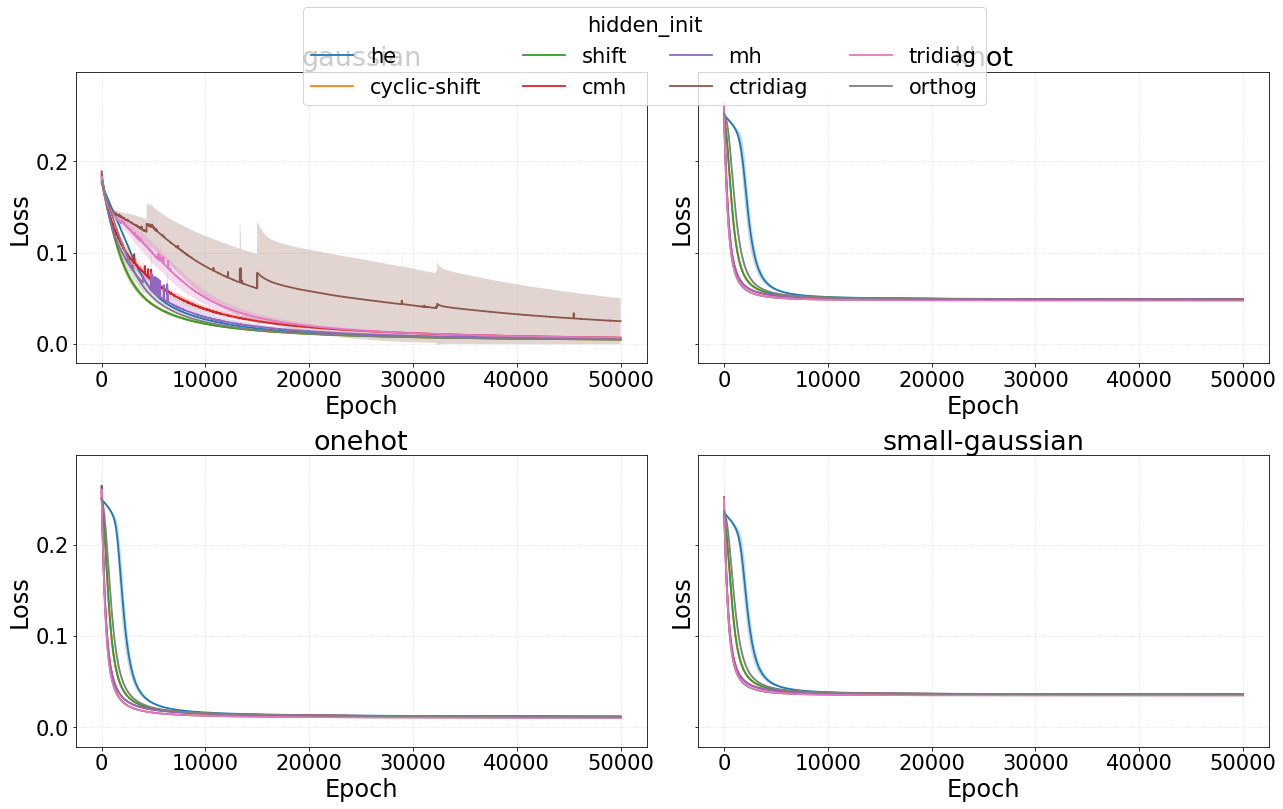

In [7]:
# A) One plot for each input type (4 total), grid layout
pm.plot_learning_curves_all_inputs(
    ts_bucket_path=ts_path,
    layout="grid",  # or "separate"
    show_individual=False,  # set True to see individual runs faintly
    hidden_inits=HIDDEN_WEIGHT_INITS,  # optional subset
    font_scale=1.5,
)

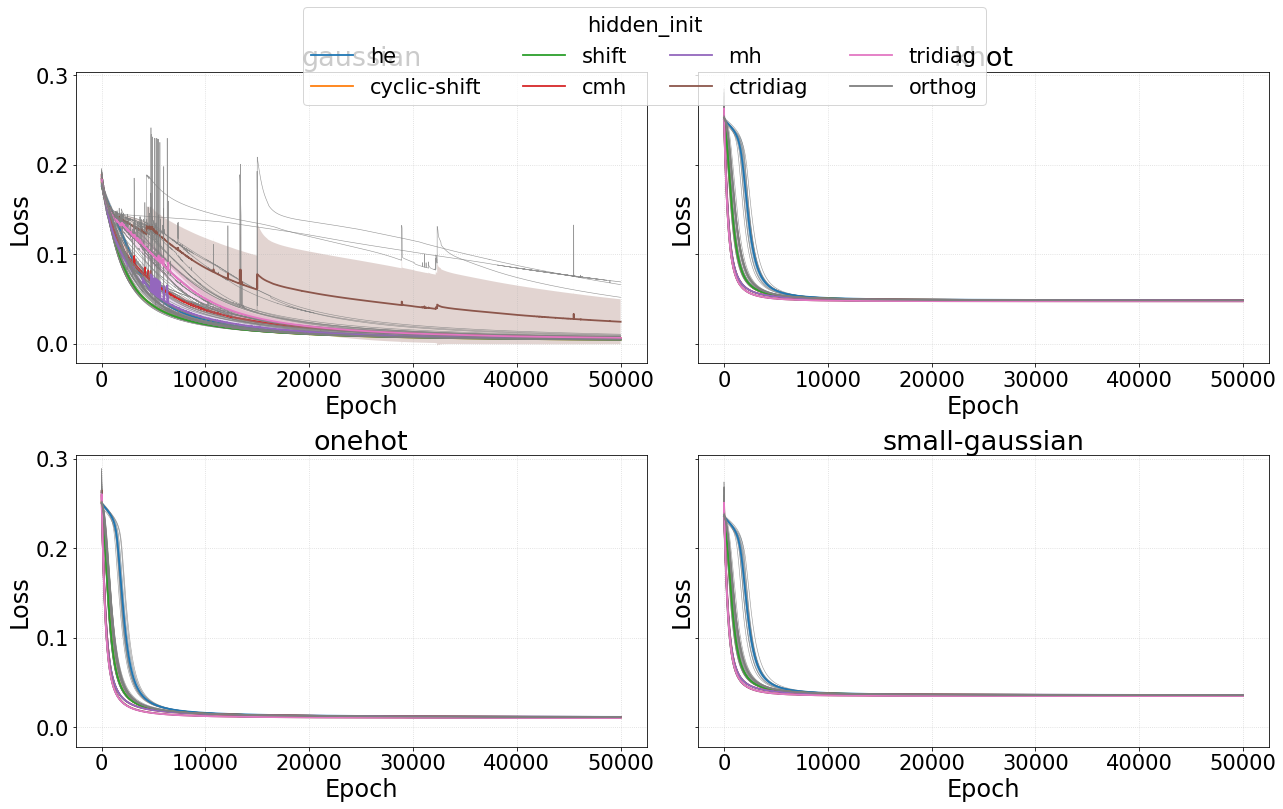

In [ ]:
pm.plot_learning_curves_all_inputs(
    ts_bucket_path=ts_path,
    layout="grid",  # or "separate"
    show_individual=True,  # set True to see individual runs faintly
    hidden_inits=HIDDEN_WEIGHT_INITS,  # optional subset
    font_scale=1.5,
    alpha_runs=0.8,
)

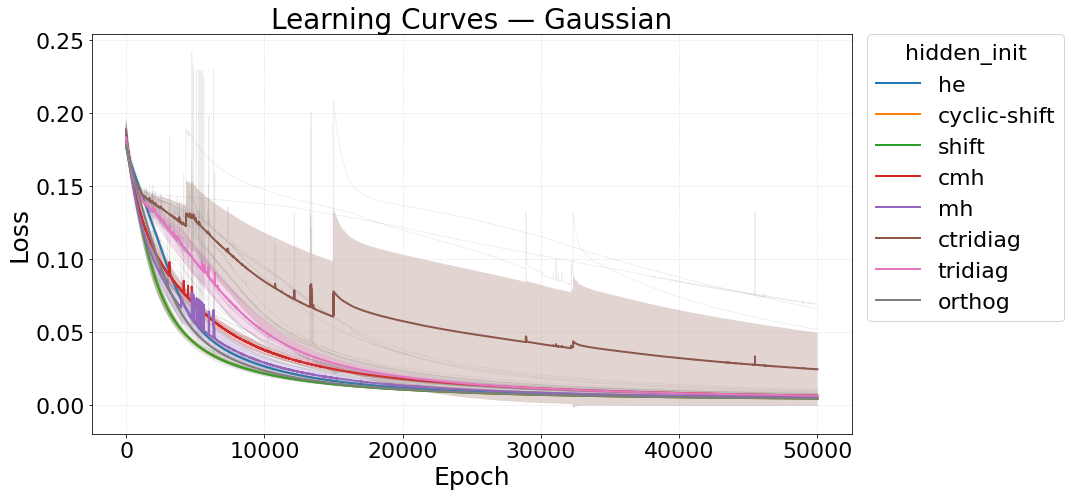

In [9]:
pm.plot_learning_curves_for_input_type(
    ts_bucket_path=ts_path,
    input_type="gaussian",  # 🔑 focus on one encoding type
    figsize=(15, 7),
    hidden_inits=HIDDEN_WEIGHT_INITS,  # optional subset
    show_individual=True,  # faint individual runs
    font_scale=1.6,  # bigger fonts for papers/presentations
    title="Learning Curves — Gaussian",
)

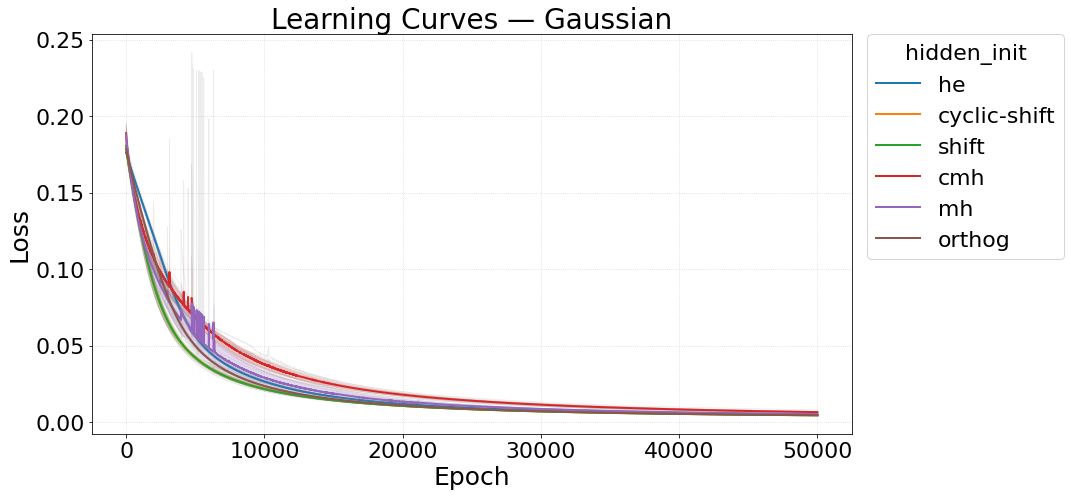

In [ ]:
pm.plot_learning_curves_for_input_type(
    ts_bucket_path=ts_path,
    input_type="gaussian",  # 🔑 focus on one encoding type
    figsize=(15, 7),
    hidden_inits=[
        "he",
        "cyclic-shift",
        "shift",
        "cmh",
        "mh",
        "orthog",
    ],  # optional subset
    show_individual=True,  # faint individual runs
    font_scale=1.6,  # bigger fonts for papers/presentations
    title="Learning Curves — Gaussian",
)

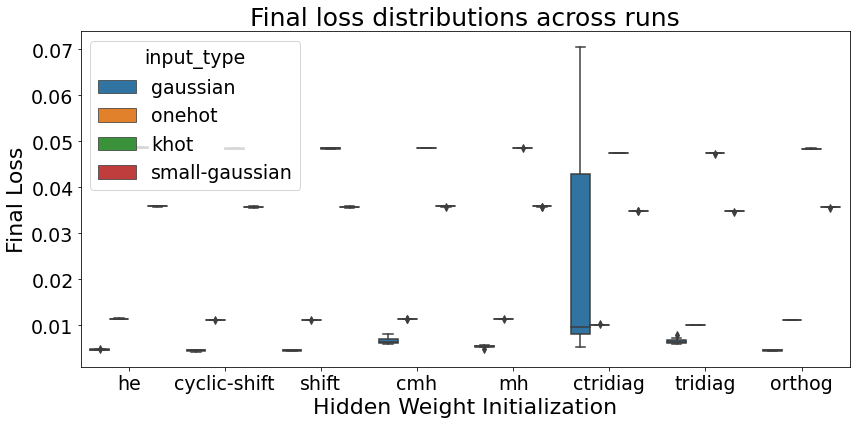

In [11]:
# 1) Final loss distributions
pm.plot_final_loss_boxplot(per_run_csv=per_run_csv)

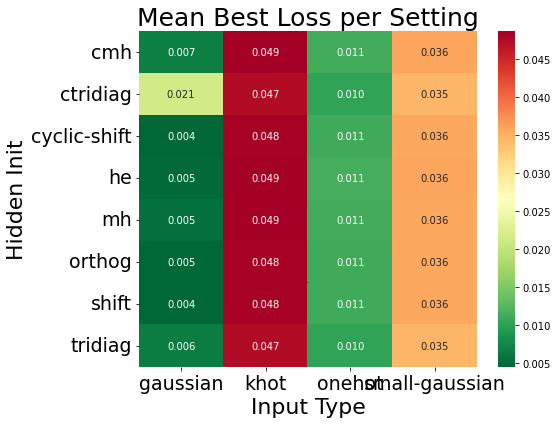

In [12]:
# 2) Heatmap of mean best loss
pm.plot_best_loss_heatmap(agg_csv=agg_csv)

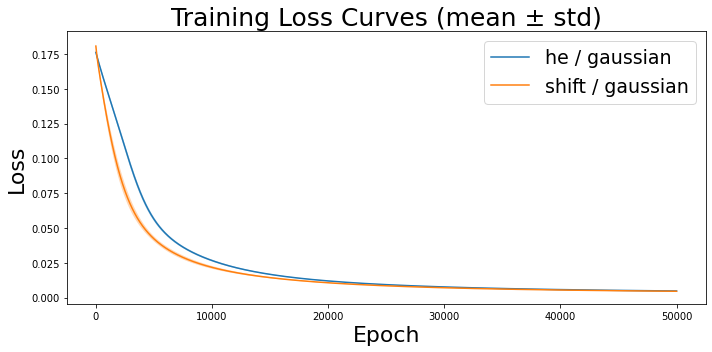

In [13]:
# 3) Loss curves (mean ± std) for selected settings
pm.plot_loss_curves_mean_std(
    ts_bucket_path=ts_path, settings=[("he", "gaussian"), ("shift", "gaussian")]
)

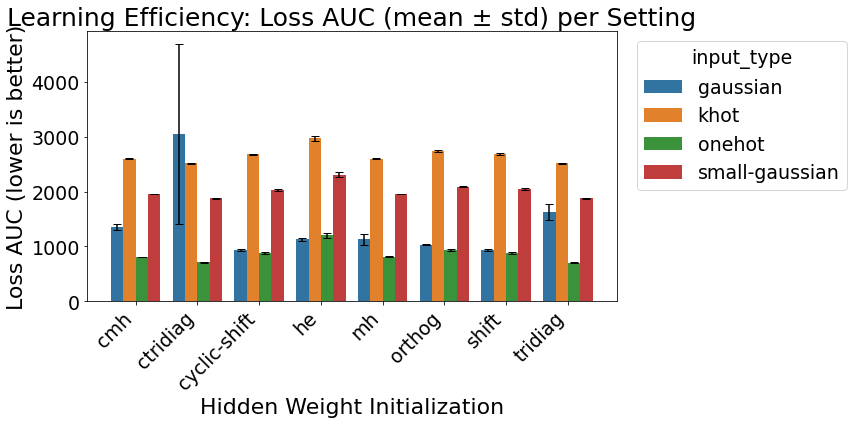

In [14]:
# 4) Barplot with error bars (loss AUC)
pm.plot_loss_auc_bar_with_std(agg_csv=agg_csv)

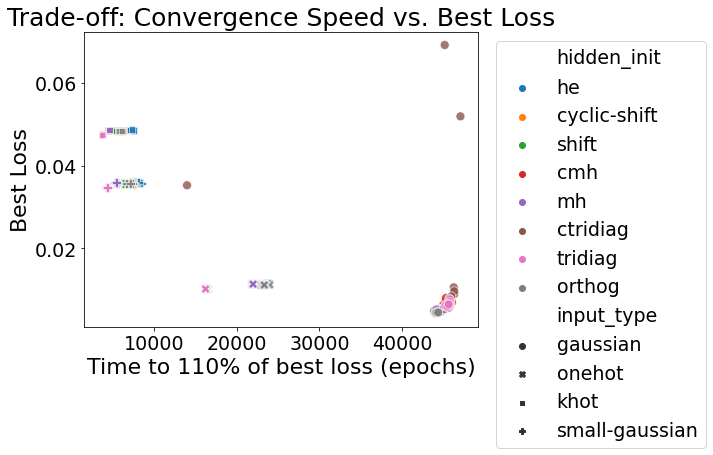

In [15]:
# 5) Scatter: speed vs performance
pm.plot_speed_vs_best_scatter(per_run_csv=per_run_csv)

../PlotMultiruns.py:530: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


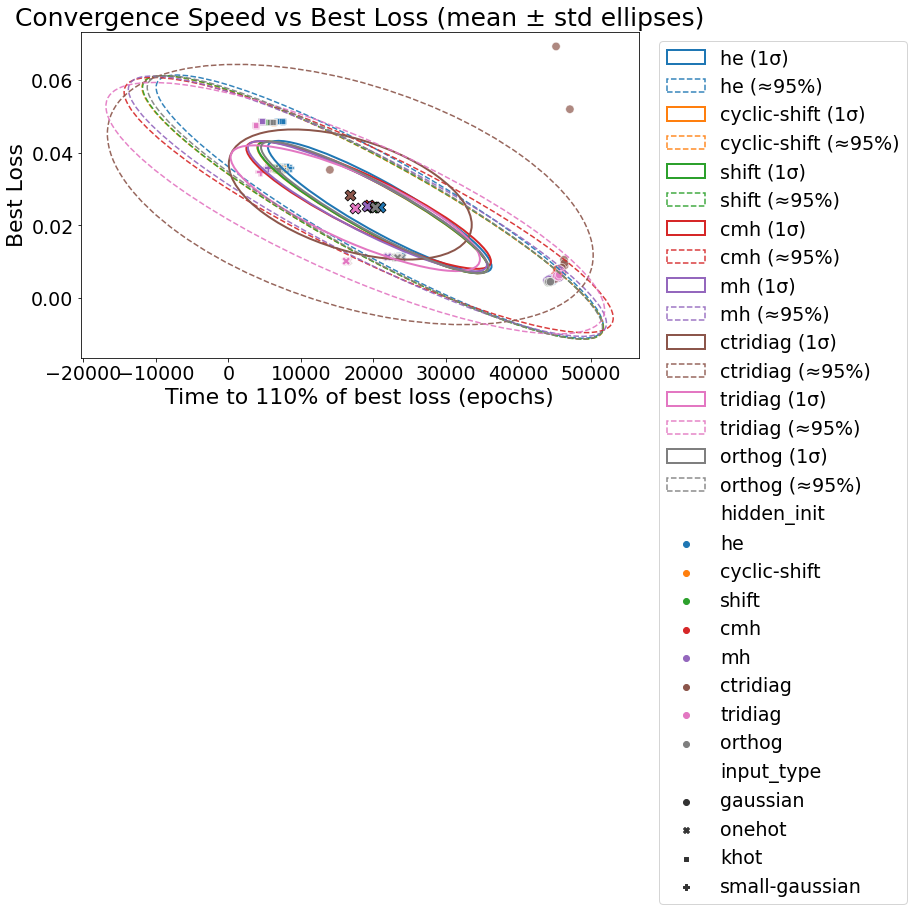

In [16]:
# 6) Scatter + ellipses
pm.plot_speed_vs_best_scatter_with_ellipses(per_run_csv=per_run_csv)

In [17]:
for k in agg_all.keys():
    print(k)

hidden_init
input_type
num_runs
final_loss_mean
final_loss_std
best_loss_mean
best_loss_std
best_epoch_mean
best_epoch_std
loss_auc_mean
loss_auc_std
time_to_110pct_best_mean
time_to_110pct_best_std
final_loss_batch_mean_mean
final_loss_batch_mean_std
final_loss_batch_std_mean
final_loss_batch_std_std
final_frob_mean
final_frob_std
final_drift_from_init_mean
final_drift_from_init_std
final_spectral_radius_mean
final_spectral_radius_std
final_spectral_norm_mean
final_spectral_norm_std
final_min_singular_mean
final_min_singular_std
final_cond_num_mean
final_cond_num_std
final_orth_err_mean
final_orth_err_std
final_w_max_abs_mean
final_w_max_abs_std
final_w_sparsity_mean
final_w_sparsity_std
final_act_mean_mean
final_act_mean_std
final_act_std_mean
final_act_std_std
final_tanh_sat_mean
final_tanh_sat_std
loss_mean_mean
loss_mean_std
loss_std_mean
loss_std_std
loss_max_mean
loss_max_std
loss_min_mean
loss_min_std
loss_batch_mean_mean_mean
loss_batch_mean_mean_std
loss_batch_mean_std_mean
l

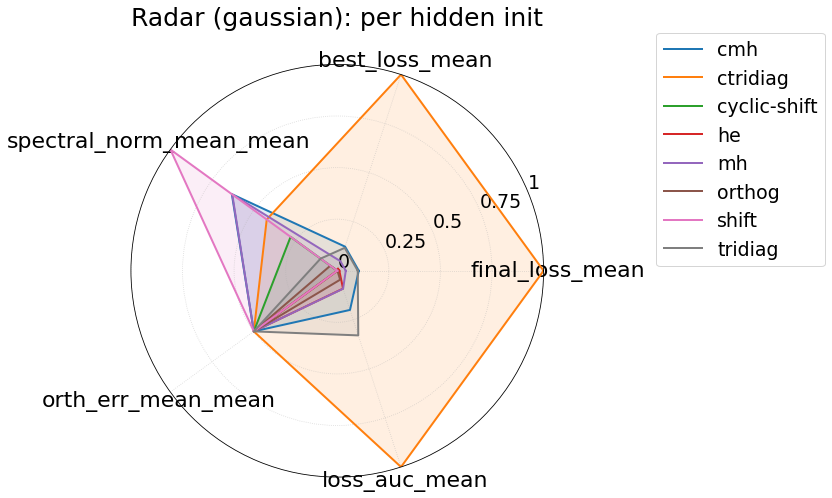

In [ ]:
# A) Single input type ("gaussian"), overlay polygons per hidden_init
pm.plot_radar_metrics_for_input_type(
    agg_csv=agg_csv,
    input_type="gaussian",
    hidden_inits=HIDDEN_WEIGHT_INITS,
    metrics=[
        "final_loss_mean",
        "best_loss_mean",
        "spectral_norm_mean_mean",
        "orth_err_mean_mean",
        "loss_auc_mean",
    ],
    overlay_per_init=True,  # one polygon per init
    normalize="minmax",
    title="Radar (gaussian): per hidden init",
    figsize=(10, 8),
)

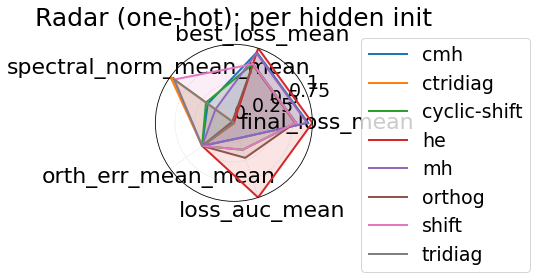

In [19]:
pm.plot_radar_metrics_for_input_type(
    agg_csv=agg_csv,
    input_type="onehot",
    hidden_inits=HIDDEN_WEIGHT_INITS,
    metrics=[
        "final_loss_mean",
        "best_loss_mean",
        "spectral_norm_mean_mean",
        "orth_err_mean_mean",
        "loss_auc_mean",
    ],
    overlay_per_init=True,  # one polygon per init
    normalize="minmax",
    title="Radar (one-hot): per hidden init",
)

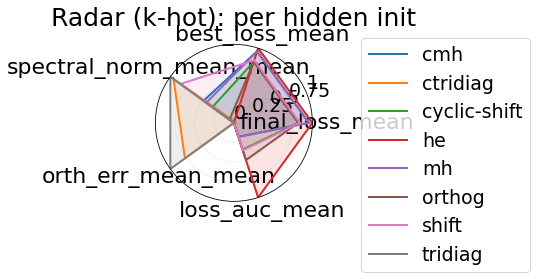

In [20]:
pm.plot_radar_metrics_for_input_type(
    agg_csv=agg_csv,
    input_type="khot",
    hidden_inits=HIDDEN_WEIGHT_INITS,
    metrics=[
        "final_loss_mean",
        "best_loss_mean",
        "spectral_norm_mean_mean",
        "orth_err_mean_mean",
        "loss_auc_mean",
    ],
    overlay_per_init=True,  # one polygon per init
    normalize="minmax",
    title="Radar (k-hot): per hidden init",
)

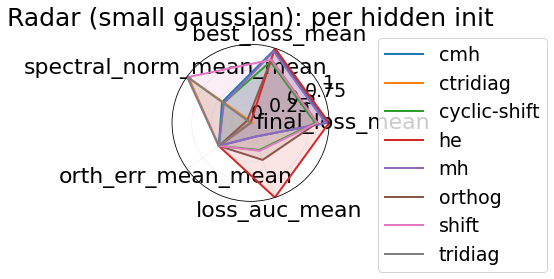

In [21]:
pm.plot_radar_metrics_for_input_type(
    agg_csv=agg_csv,
    input_type="small-gaussian",
    hidden_inits=HIDDEN_WEIGHT_INITS,
    metrics=[
        "final_loss_mean",
        "best_loss_mean",
        "spectral_norm_mean_mean",
        "orth_err_mean_mean",
        "loss_auc_mean",
    ],
    overlay_per_init=True,  # one polygon per init
    normalize="minmax",
    title="Radar (small gaussian): per hidden init",
)

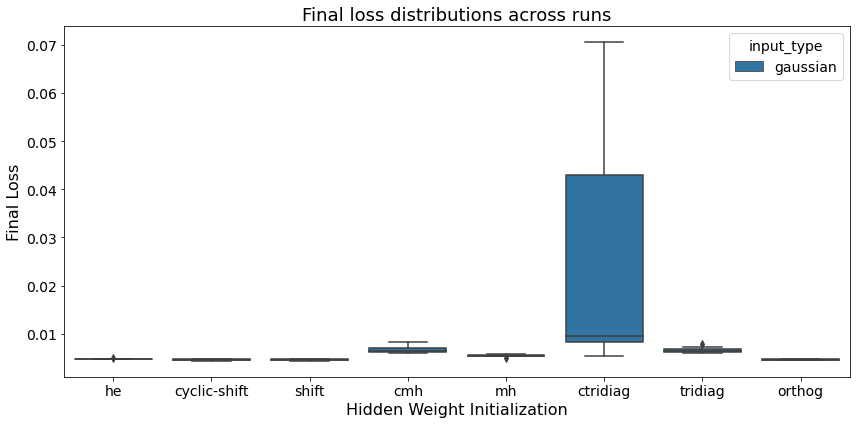

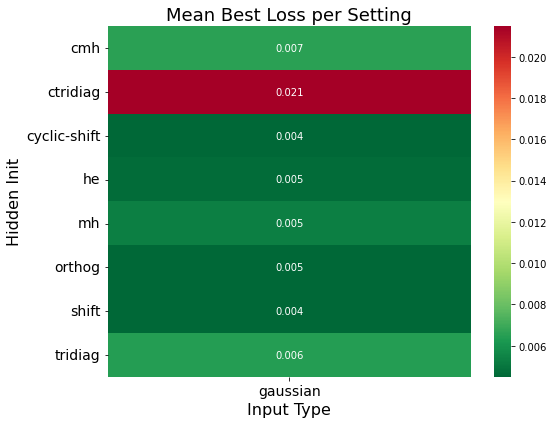

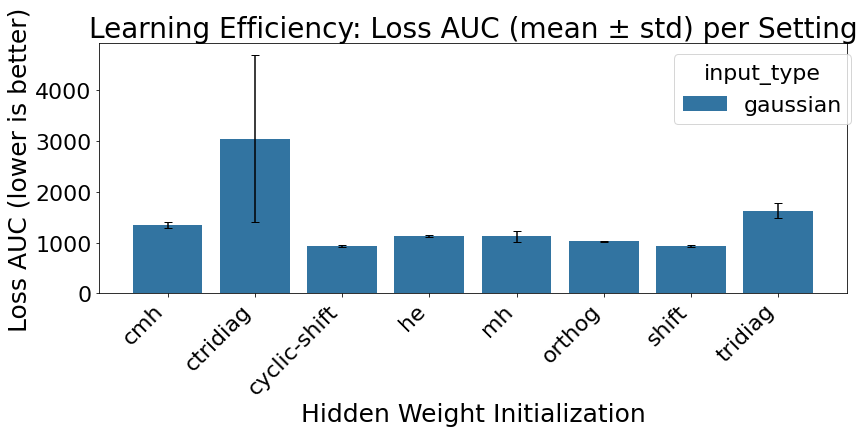

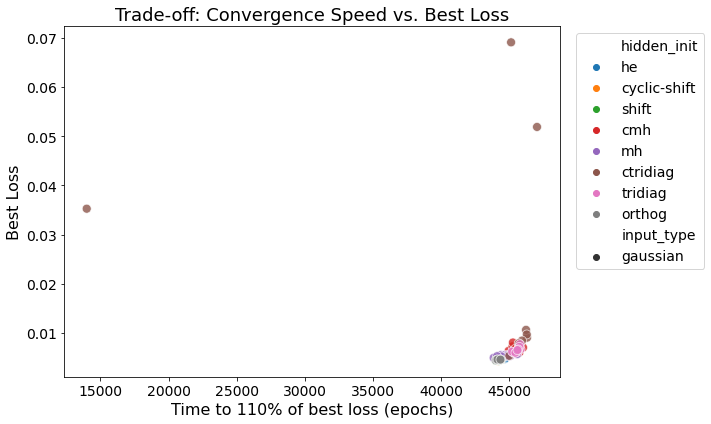

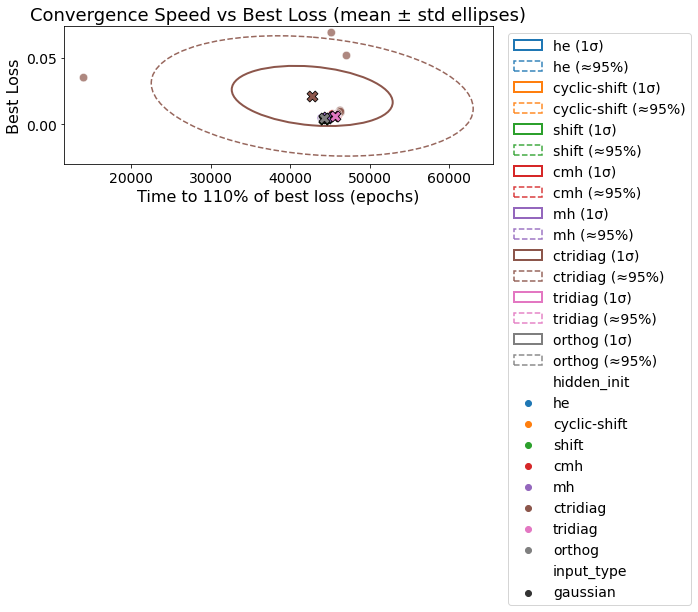

In [22]:
pm.plot_final_loss_boxplot(
    per_run_csv=per_run_csv, input_types="gaussian", font_scale=1
)
pm.plot_best_loss_heatmap(
    agg_csv=agg_csv, input_types="gaussian", font_scale=1
)  # still a 1-col heatmap
pm.plot_loss_auc_bar_with_std(agg_csv=agg_csv, input_types="gaussian", font_scale=1.6)
pm.plot_speed_vs_best_scatter(
    per_run_csv=per_run_csv, input_types="gaussian", font_scale=1
)
pm.plot_speed_vs_best_scatter_with_ellipses(
    per_run_csv=per_run_csv, input_types="gaussian", font_scale=1
)

In [23]:
ts_bucket[("he", "gaussian")].keys()

dict_keys(['losses', 'metrics_df_list', 'grad_df_list', 'history_df_list'])

In [24]:
ts_bucket[("he", "gaussian")]["metrics_df_list"][0].keys()

Index(['epoch', 'loss', 'loss_batch_mean', 'loss_batch_std', 'frob',
       'drift_from_init', 'spectral_radius', 'spectral_norm', 'min_singular',
       'cond_num', 'orth_err', 'w_max_abs', 'w_sparsity', 'act_mean',
       'act_std', 'tanh_sat', 'run_id'],
      dtype='object')

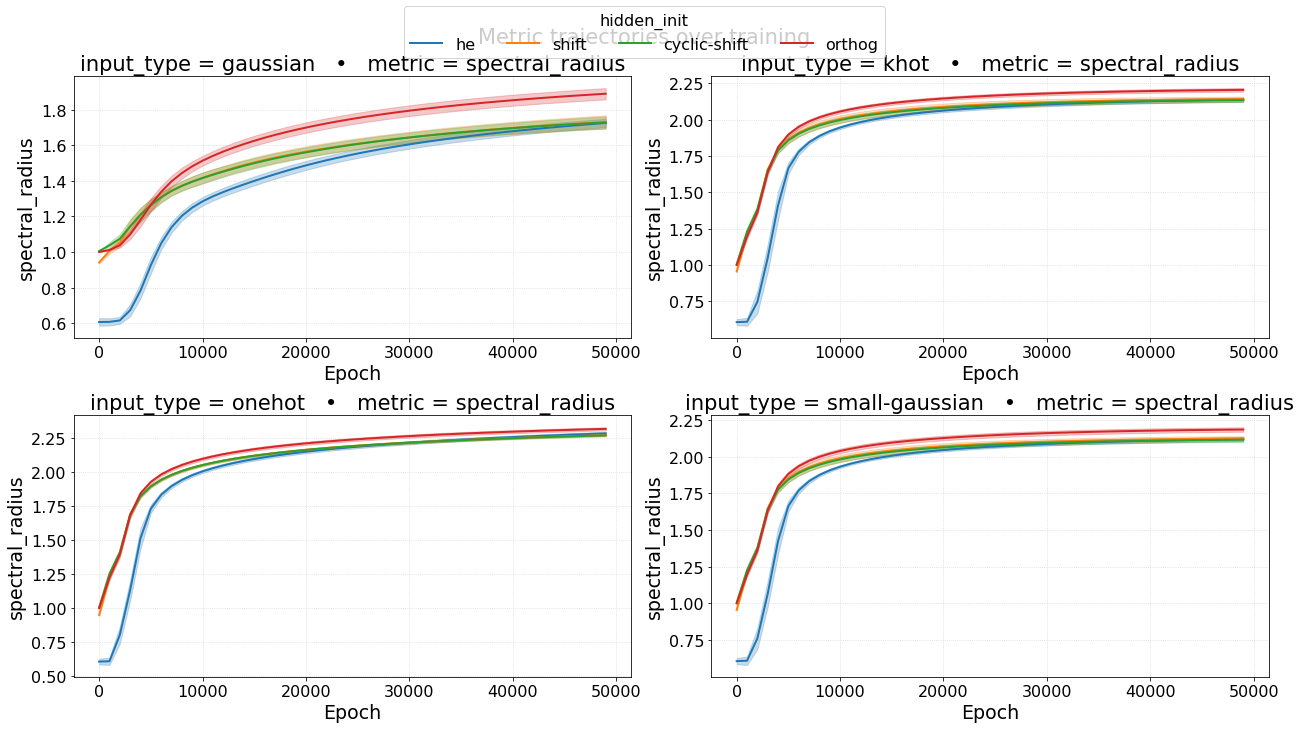

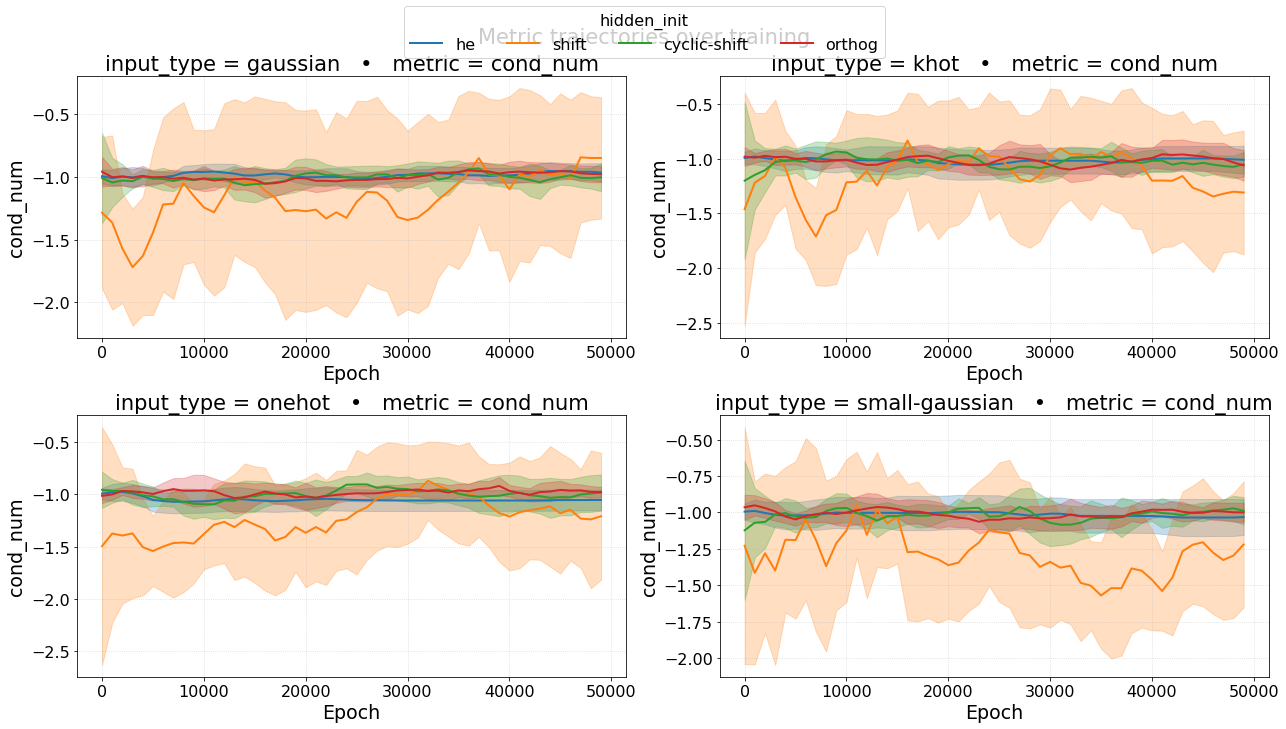

In [25]:
# A) For each input type (4 panels), compare inits on spectral_radius and cond_num
pm.plot_metric_trajectories(
    ts_bucket_path=ts_path,
    metrics=["spectral_radius", "cond_num"],
    facet_by="input_type",
    hidden_inits=["he", "shift", "cyclic-shift", "orthog"],
    show_individual=False,
    rolling=3,
    font_scale=1.2,
)

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


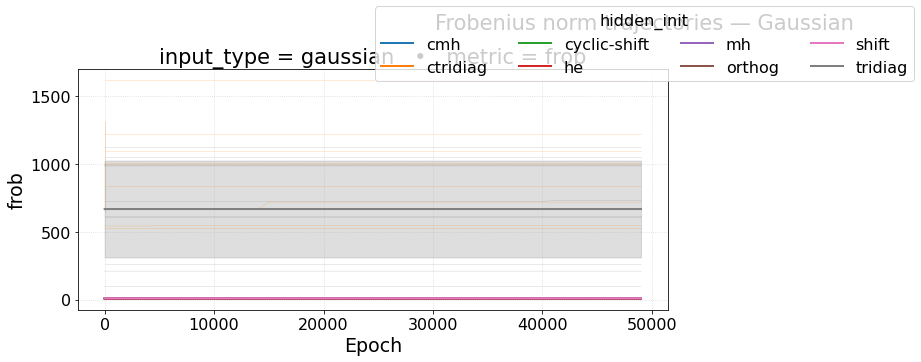

In [26]:
# B) For one encoding (gaussian), compare inits on frob only
pm.plot_metric_trajectories(
    ts_bucket_path=ts_path,
    metrics="frob",
    input_types="gaussian",
    facet_by="input_type",  # single panel
    show_individual=True,
    rolling=None,
    font_scale=1.2,
    title="Frobenius norm trajectories — Gaussian",
)

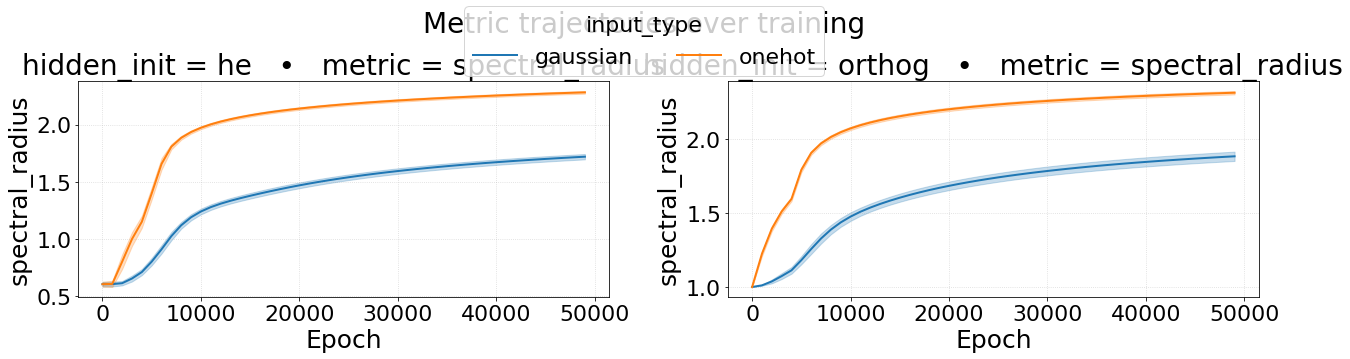

In [27]:
# C) Facet by init (one panel per init), color by input type
pm.plot_metric_trajectories(
    ts_bucket_path=ts_path,
    metrics=["spectral_radius"],
    facet_by="hidden_init",
    input_types=["gaussian", "onehot"],
    hidden_inits=["he", "orthog"],
    show_individual=False,
    rolling=5,
    font_scale=1.6,
)

In [28]:
ts_bucket[("he", "gaussian")]["grad_df_list"][0].keys()

Index(['grad_mean_sum', 'grad_std_sum', 'grad_l2_norm_sum', 'grad_mean_sq_sum',
       'grad_max_abs_sum', 'grad_sparsity_sum', 'grad_mean_max',
       'grad_std_max', 'grad_l2_norm_max', 'grad_mean_sq_max',
       'grad_max_abs_max', 'grad_sparsity_max', 'grad_mean_mean',
       'grad_std_mean', 'grad_l2_norm_mean', 'grad_mean_sq_mean',
       'grad_max_abs_mean', 'grad_sparsity_mean', 'grad_group_rnn_l2_norm',
       'grad_group_linear_l2_norm', 'epoch', 'run_id'],
      dtype='object')

In [ ]:
HIDDEN_WEIGHT_INITS

['he', 'cyclic-shift', 'shift', 'cmh', 'mh', 'ctridiag', 'tridiag', 'orthog']

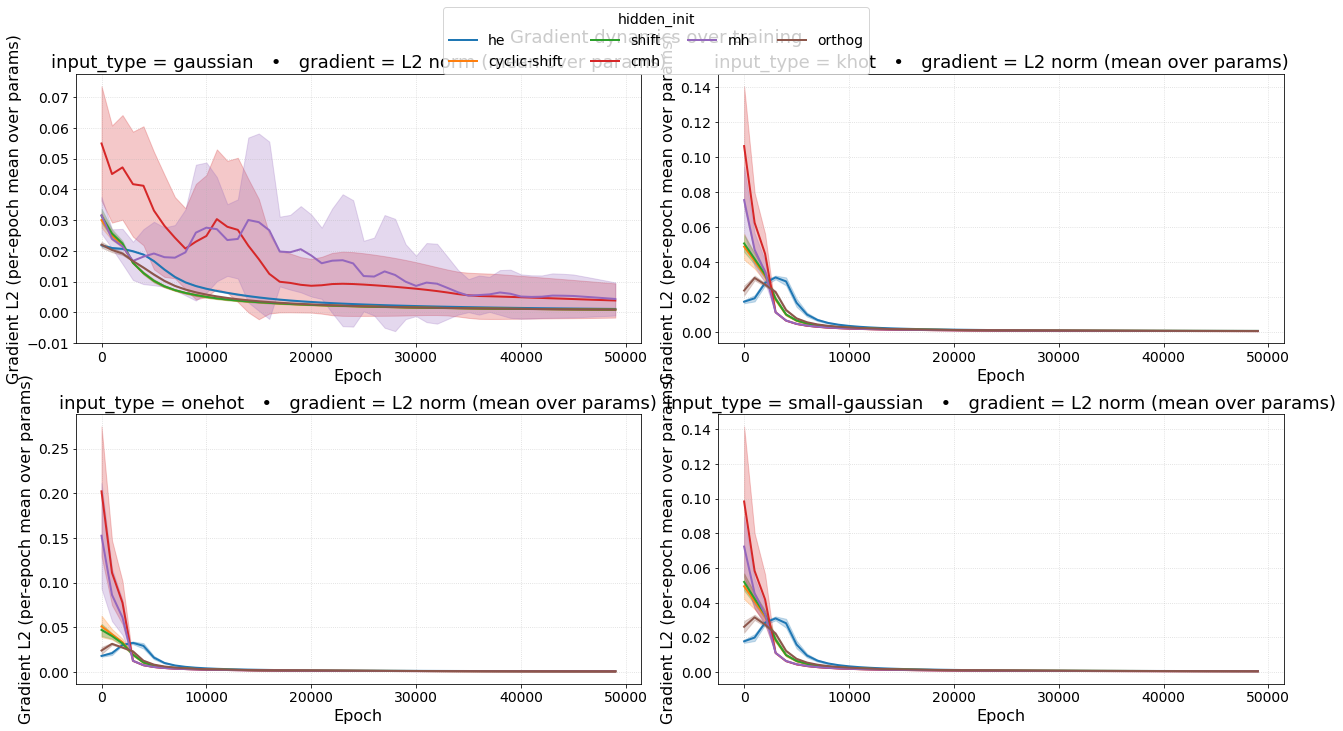

In [30]:
# 4 facets (one per input), lines per init, mean ± std
pm.plot_gradient_dynamics(
    ts_bucket_path=ts_path,
    facet_by="input_type",
    hidden_inits=[
        "he",
        "cyclic-shift",
        "shift",
        "cmh",
        "mh",
        "orthog",
    ],
    show_individual=False,
    rolling=3,
    font_scale=1,
)

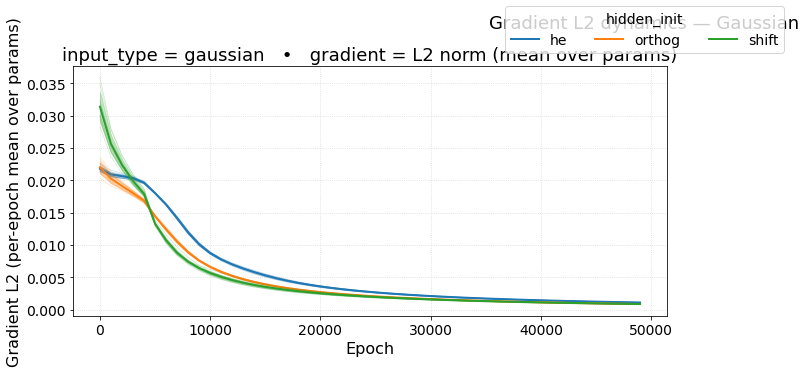

In [31]:
# Single facet for gaussian, compare selected inits with individual runs shown
pm.plot_gradient_dynamics(
    ts_bucket_path=ts_path,
    input_types="gaussian",
    hidden_inits=["he", "orthog", "shift"],
    show_individual=True,
    rolling=5,
    font_scale=1,
    title="Gradient L2 dynamics — Gaussian",
)

In [32]:
ts_bucket[("he", "gaussian")]["history_df_list"][0].keys()

Index(['epoch', 'loss', 'grad_norm', 'run_id'], dtype='object')

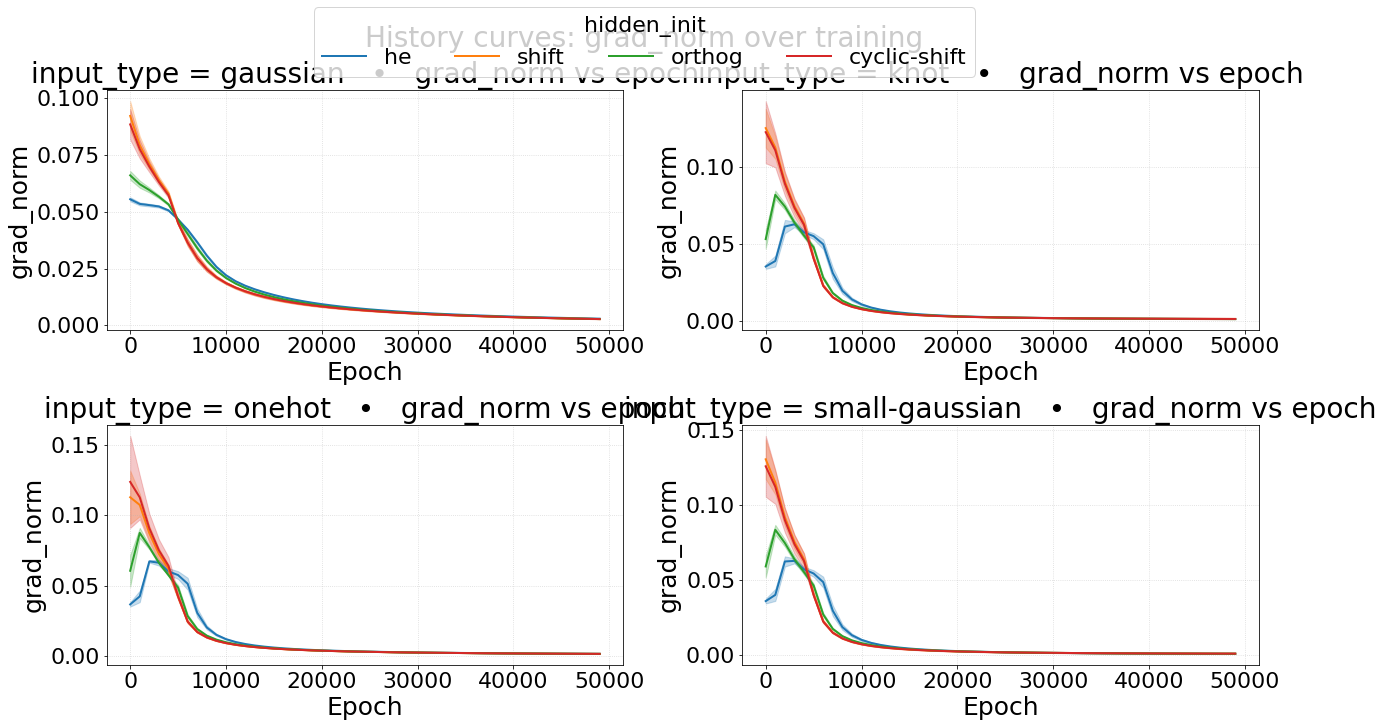

In [33]:
# 1) Grad norm (default), one panel per input type, smoothed, mean±std
pm.plot_history_metric(
    ts_bucket_path=ts_path,
    metric="grad_norm",
    facet_by="input_type",
    hidden_inits=["he", "shift", "orthog", "cyclic-shift"],
    rolling=5,
    show_individual=False,
    font_scale=1.6,
)

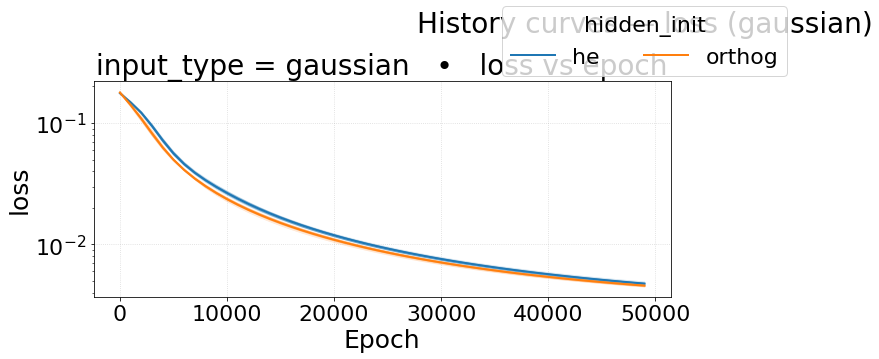

In [34]:
# 2) Loss trajectories for gaussian only, with individual runs and log scale
pm.plot_history_metric(
    ts_bucket_path=ts_path,
    metric="loss",  # <- just change metric
    input_types="gaussian",
    hidden_inits=["he", "orthog"],
    show_individual=True,
    y_log=True,
    font_scale=1.6,
    title="History curves — loss (gaussian)",
)

Convergence speed curves

For each run, find the first epoch where its loss is <= threshold_mult * best_run_loss.
The curve at epoch t shows the fraction of runs that have already crossed that threshold by t. 
If some runs never cross it, the curve plateaus below 100% (useful)

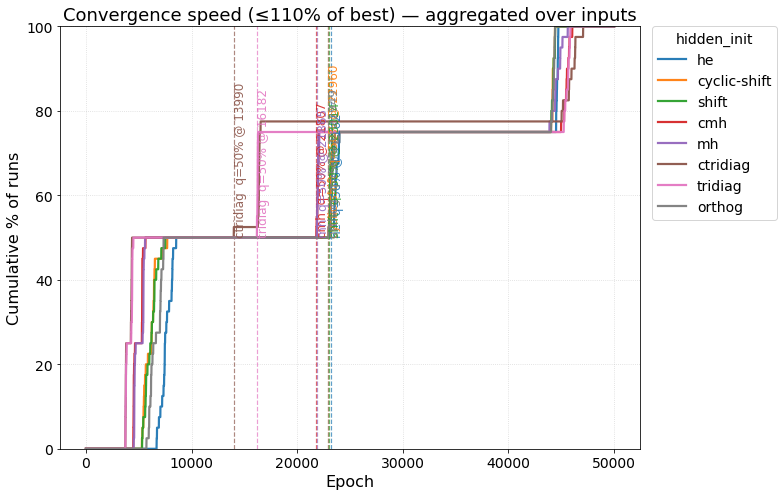

In [35]:
# 1) Aggregate across inputs: per-init curves, with median vertical lines
pm.plot_convergence_speed_curves(
    ts_bucket_path=ts_path,
    hidden_inits=HIDDEN_WEIGHT_INITS,
    threshold_mult=1.10,
    aggregate_over_inputs=True,
    show_quantiles=[0.5],  # median time to within 110%
    rolling=3,
    percent=True,
    font_scale=1,
    title="Convergence speed (≤110% of best) — aggregated over inputs",
)

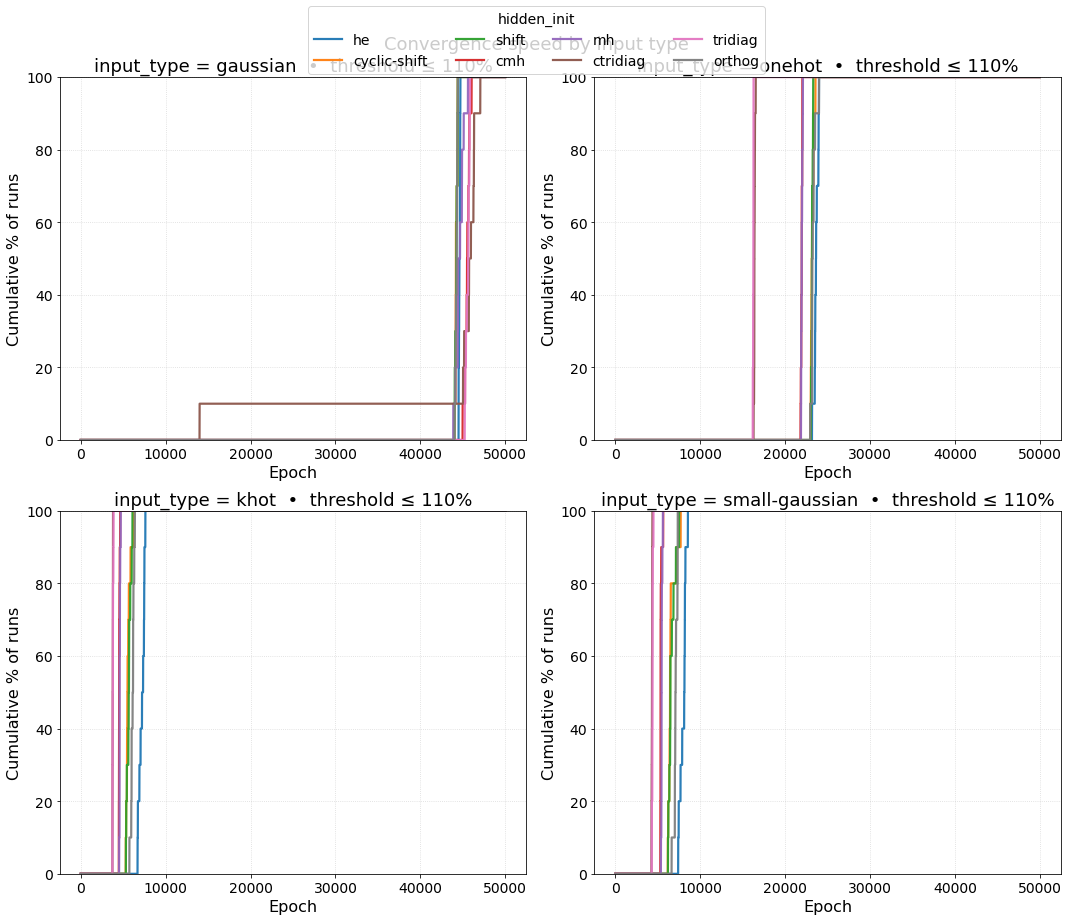

In [36]:
# 2) Facet by input type (4 panels), per-init curves within each
pm.plot_convergence_speed_curves(
    ts_bucket_path=ts_path,
    input_types=["gaussian", "onehot", "khot", "small-gaussian"],
    hidden_inits=HIDDEN_WEIGHT_INITS,
    threshold_mult=1.10,
    aggregate_over_inputs=False,  # facet by input
    show_quantiles=None,
    font_scale=1,
    figsize=(15, 7),
    title="Convergence speed by input type",
)

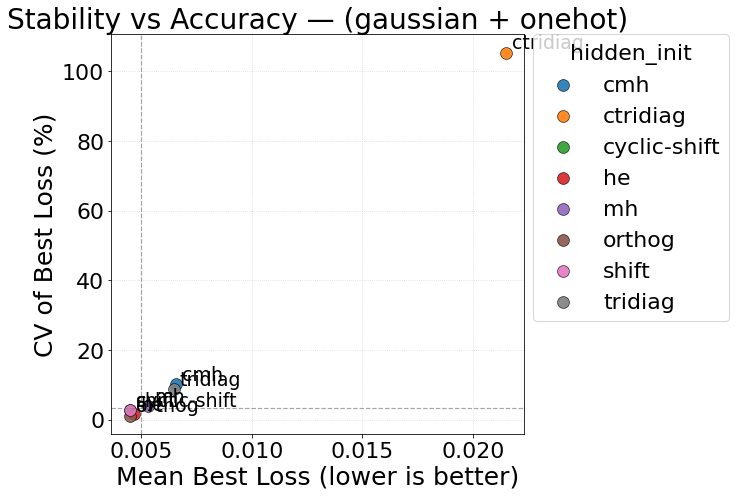

In [37]:
# A) One point per init, aggregated over gaussian + onehot
pm.plot_stability_vs_accuracy(
    per_run_csv=per_run_csv,
    input_types="gaussian",
    aggregate_over_inputs=True,
    min_runs=5,
    percent_y=True,
    font_scale=1.6,
    title="Stability vs Accuracy — (gaussian + onehot)",
)

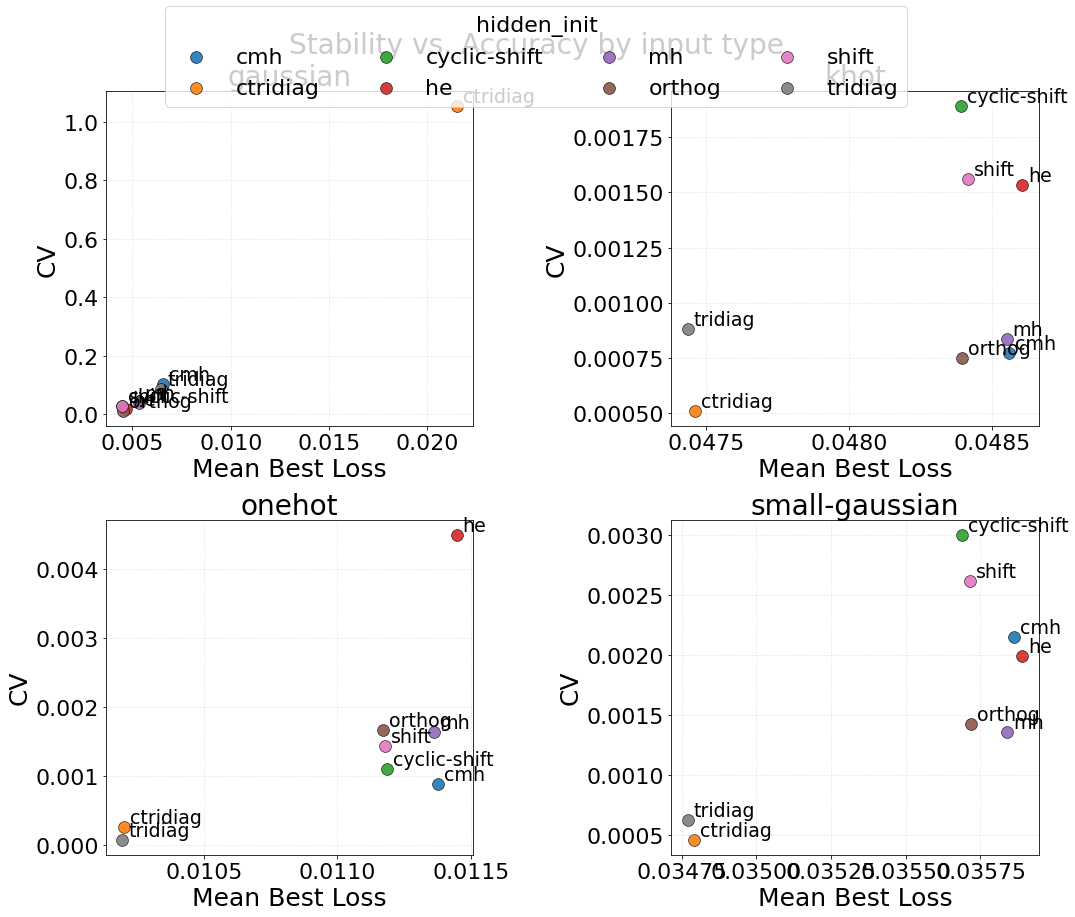

In [ ]:
# B) Faceted by input type (points per init/input), only selected inits
pm.plot_stability_vs_accuracy(
    per_run_csv=per_run_csv,
    hidden_inits=HIDDEN_WEIGHT_INITS,
    aggregate_over_inputs=False,
    min_runs=3,
    percent_y=False,
    font_scale=1.6,
    figsize=(15, 7),
)

X dtype: float64
Any strings? False
Any NaNs? False
Samples, Features: (80, 303)


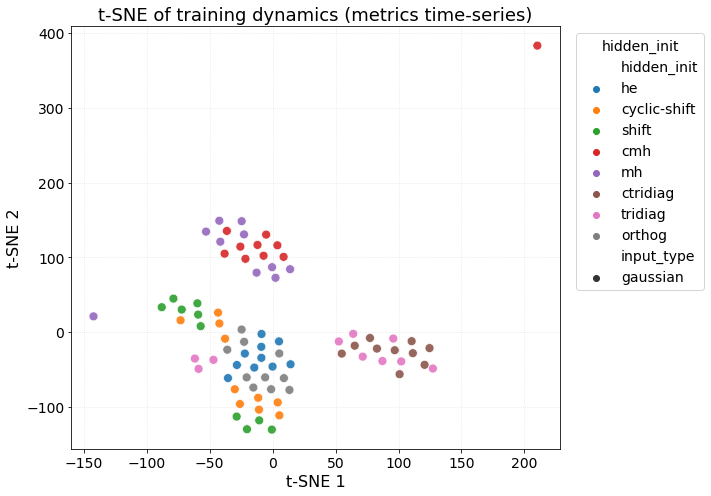

In [ ]:
# Cluster runs using 3 metrics over first 200 epochs, z-scored, PCA→tSNE
pm.tsne_training_dynamics(
    ts_bucket_path=ts_path,
    metrics=["spectral_radius", "frob", "cond_num"],
    input_types="gaussian",
    hidden_inits=HIDDEN_WEIGHT_INITS,
    epoch_max=200,
    epoch_step=2,
    rolling=5,
    pca_components=30,
    perplexity=25,
    n_iter=1500,
    font_scale=1,
    annotate=False,
    figsize=(10, 7),
)

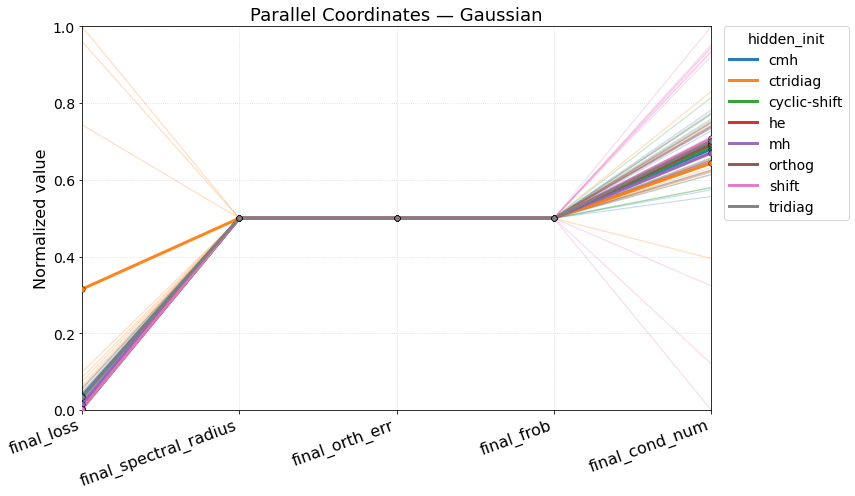

In [40]:
# A) Default: color by init, normalized to [0,1], show group means
pm.plot_parallel_coordinates(
    per_run_csv=per_run_csv,
    metrics=[
        "final_loss",
        "final_spectral_radius",
        "final_orth_err",
        "final_frob",
        "final_cond_num",
    ],
    input_types="gaussian",
    font_scale=1,
    title="Parallel Coordinates — Gaussian",
)

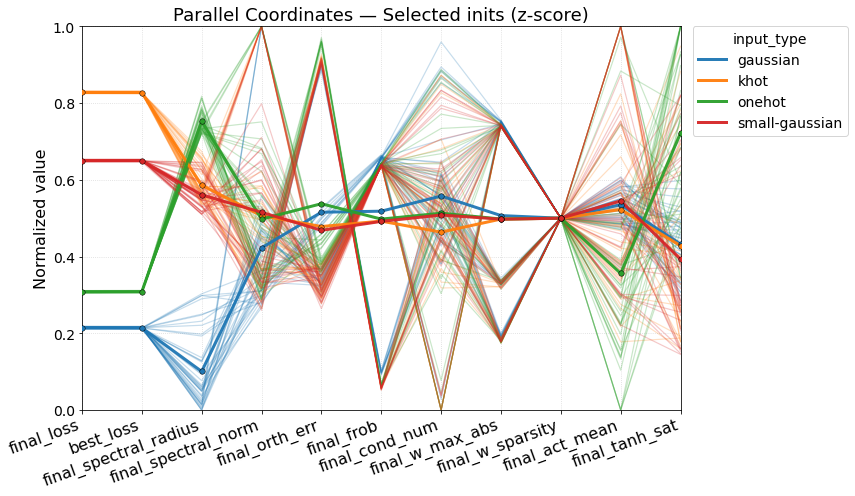

In [41]:
# B) Many runs: subsample + annotate by input type colors
pm.plot_parallel_coordinates(
    per_run_csv=per_run_csv,
    color_by="input_type",
    hidden_inits=["he", "shift", "orthog", "cyclic-shift"],
    max_runs_per_group=150,
    normalize="zscore",
    font_scale=1,
    title="Parallel Coordinates — Selected inits (z-score)",
)

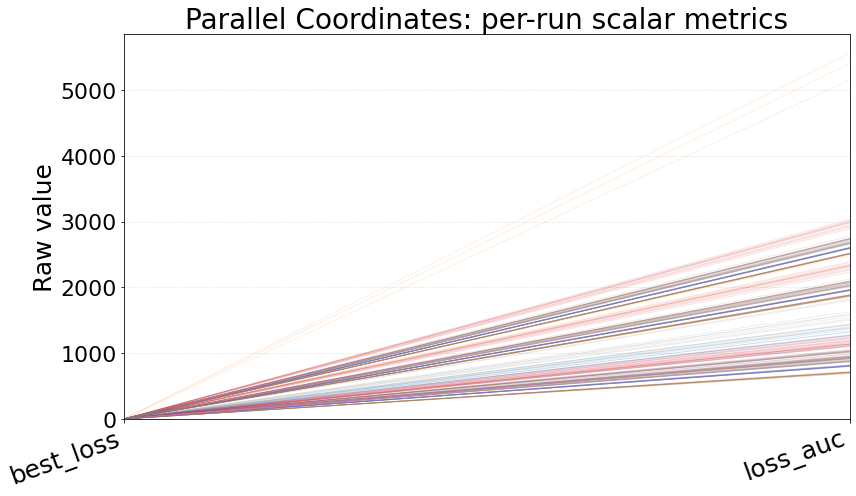

In [42]:
# C) Raw (no normalization), no group means (just spaghetti)
pm.plot_parallel_coordinates(
    per_run_csv=per_run_csv,
    metrics=[
        "best_loss",
        "final_loss_auc" if "final_loss_auc" in [] else "loss_auc",
    ],  # adapt if needed
    normalize="none",
    show_group_means=False,
    alpha=0.15,
    lw=0.8,
    font_scale=1.6,
)

Notes: Use final_* columns when possible (they’re directly comparable across runs).

If some metric columns are missing, just pass the list you have, or let the function auto-pick.

For publication figures: increase font_scale, keep show_group_means=True, and consider max_runs_per_group to reduce clutter.